In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import seaborn as sb
from tqdm import tqdm

In [2]:
#Initial conditions
Lx = 256
Ly = 256
dx = 1    #dx = dy
dt = 0.1
t_final = 10
psi0 = np.random.uniform(low=-0.1, high=0.1, size=(Lx, Ly)) # psi at time t=0 which is small values

t = np.arange(0, t_final, dt)
x = np.arange(0, Lx, 1)
y = np.arange(0, Ly, 1)
psi = np.ones((Lx, Ly))*psi0
dpsidt = np.empty((Lx, Ly))

In [3]:
#finite difference method with periodic boundary condition (PBC)

psi_final = []

for _ in tqdm(range(len(t))):
    for i in range(len(x)):
        w = i-1       #west
        e = i+1       #east
        if w == -1:
            w = w + Lx
        if e == Lx:
            e = e - Lx

        for j in range(len(y)):
            n = j-1    #north
            s = j+1    #south
            if n == -1:
                n = n + Ly
            if s == Ly:
                s = s - Ly

            dpsidt[i][j] = psi[i][j] - psi[i][j]**3 + (psi[e][j] + psi[w][j] + psi[i][n] + psi[i][s]
                                                 - 4*psi[i][j])/dx**2
            
    psi = psi + dpsidt*dt
    psi_final.append(psi)

100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


In [4]:
# storing result in dataframe and save as csv file
t_list = []
x_list = []
y_list = []
psi_list = []

for _ in tqdm(range(len(t))):
    for i in range(len(x)):
        for j in range(len(y)):
            t_list.append(_*dt)
            x_list.append(i)
            y_list.append(j)
            psi_list.append(psi_final[_][i][j])
            
df = pd.DataFrame({'time':t_list, 'x':x_list, 'y':y_list, 'psi':psi_list})
df['psi'] = df['psi'].map(lambda x: -1 if x<0 else 1)

100%|██████████| 100/100 [00:14<00:00,  7.04it/s]


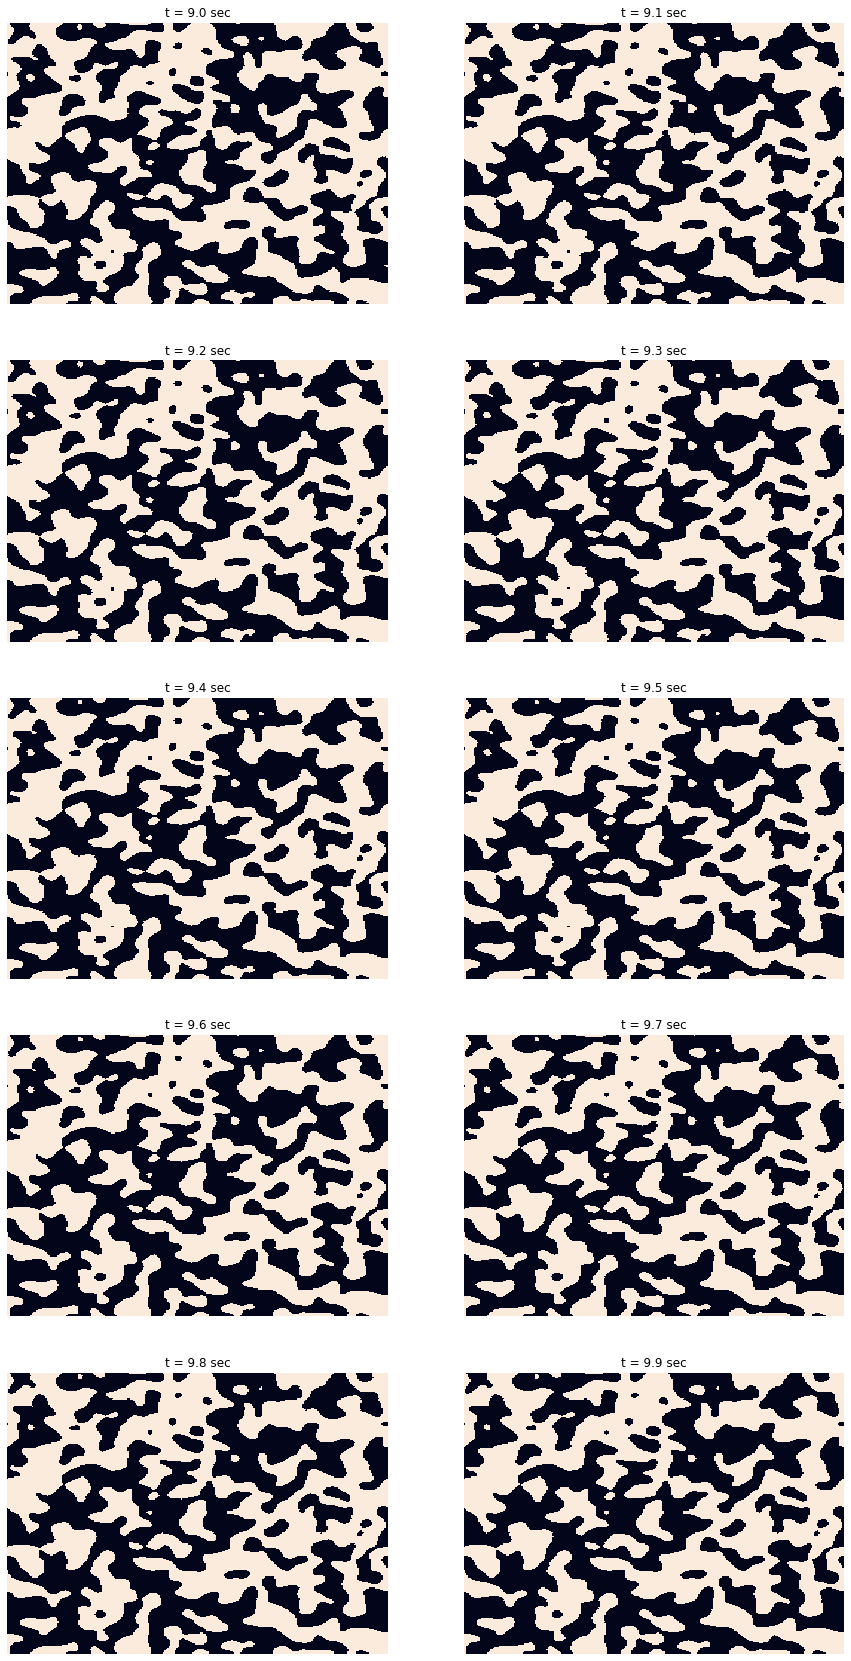

In [6]:
#plotting the heatmap
fig, ax = plt.subplots(5, 2, figsize=(15, 30))

ax = ax.ravel()

for i, j in enumerate(t[90:100]):
    df_i = df[df['time']==j]
    sb.heatmap(df_i.pivot(index = 'y', columns='x', values='psi'), ax=ax[i], cbar=False)
    ax[i].set_title(f't = {np.round(j, 2)} sec')
    ax[i].axis('off')